# Stage 1

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
data_df = pd.read_csv("diamonds.csv")
data_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [100]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [101]:
print(data_df.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


So we don't have missing data but it seems here that the first column is only index so let's drop it

In [102]:
data_df = data_df.drop(["Unnamed: 0"], axis=1)
data_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


It seems strange to have some x, y, and z minimum values at 0. Indeed, if some of these values are null, it means that we have two-dimensional diamonds or even less. For logical reasons, we are going to remove data with such values.

In [103]:
#let's drop those 0 values point
data_df = data_df.drop(data_df[data_df["x"]==0].index)
data_df = data_df.drop(data_df[data_df["y"]==0].index)
data_df = data_df.drop(data_df[data_df["z"]==0].index)
data_df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


From this sort we have remove 20 points.

In [104]:
diamonds_above_5_carat = data_df[data_df["carat"] > 4]
diamonds_above_5_carat.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


Verification of diamond prices and dataset consistency: The maximum price appears relatively low, but we notice that the larger diamonds all seem to have relatively low prices. However, they are observed to have colors between I, J, and H, which are considered lower-quality colors. This makes the data consistent. (Validation with the RAPAPORT).


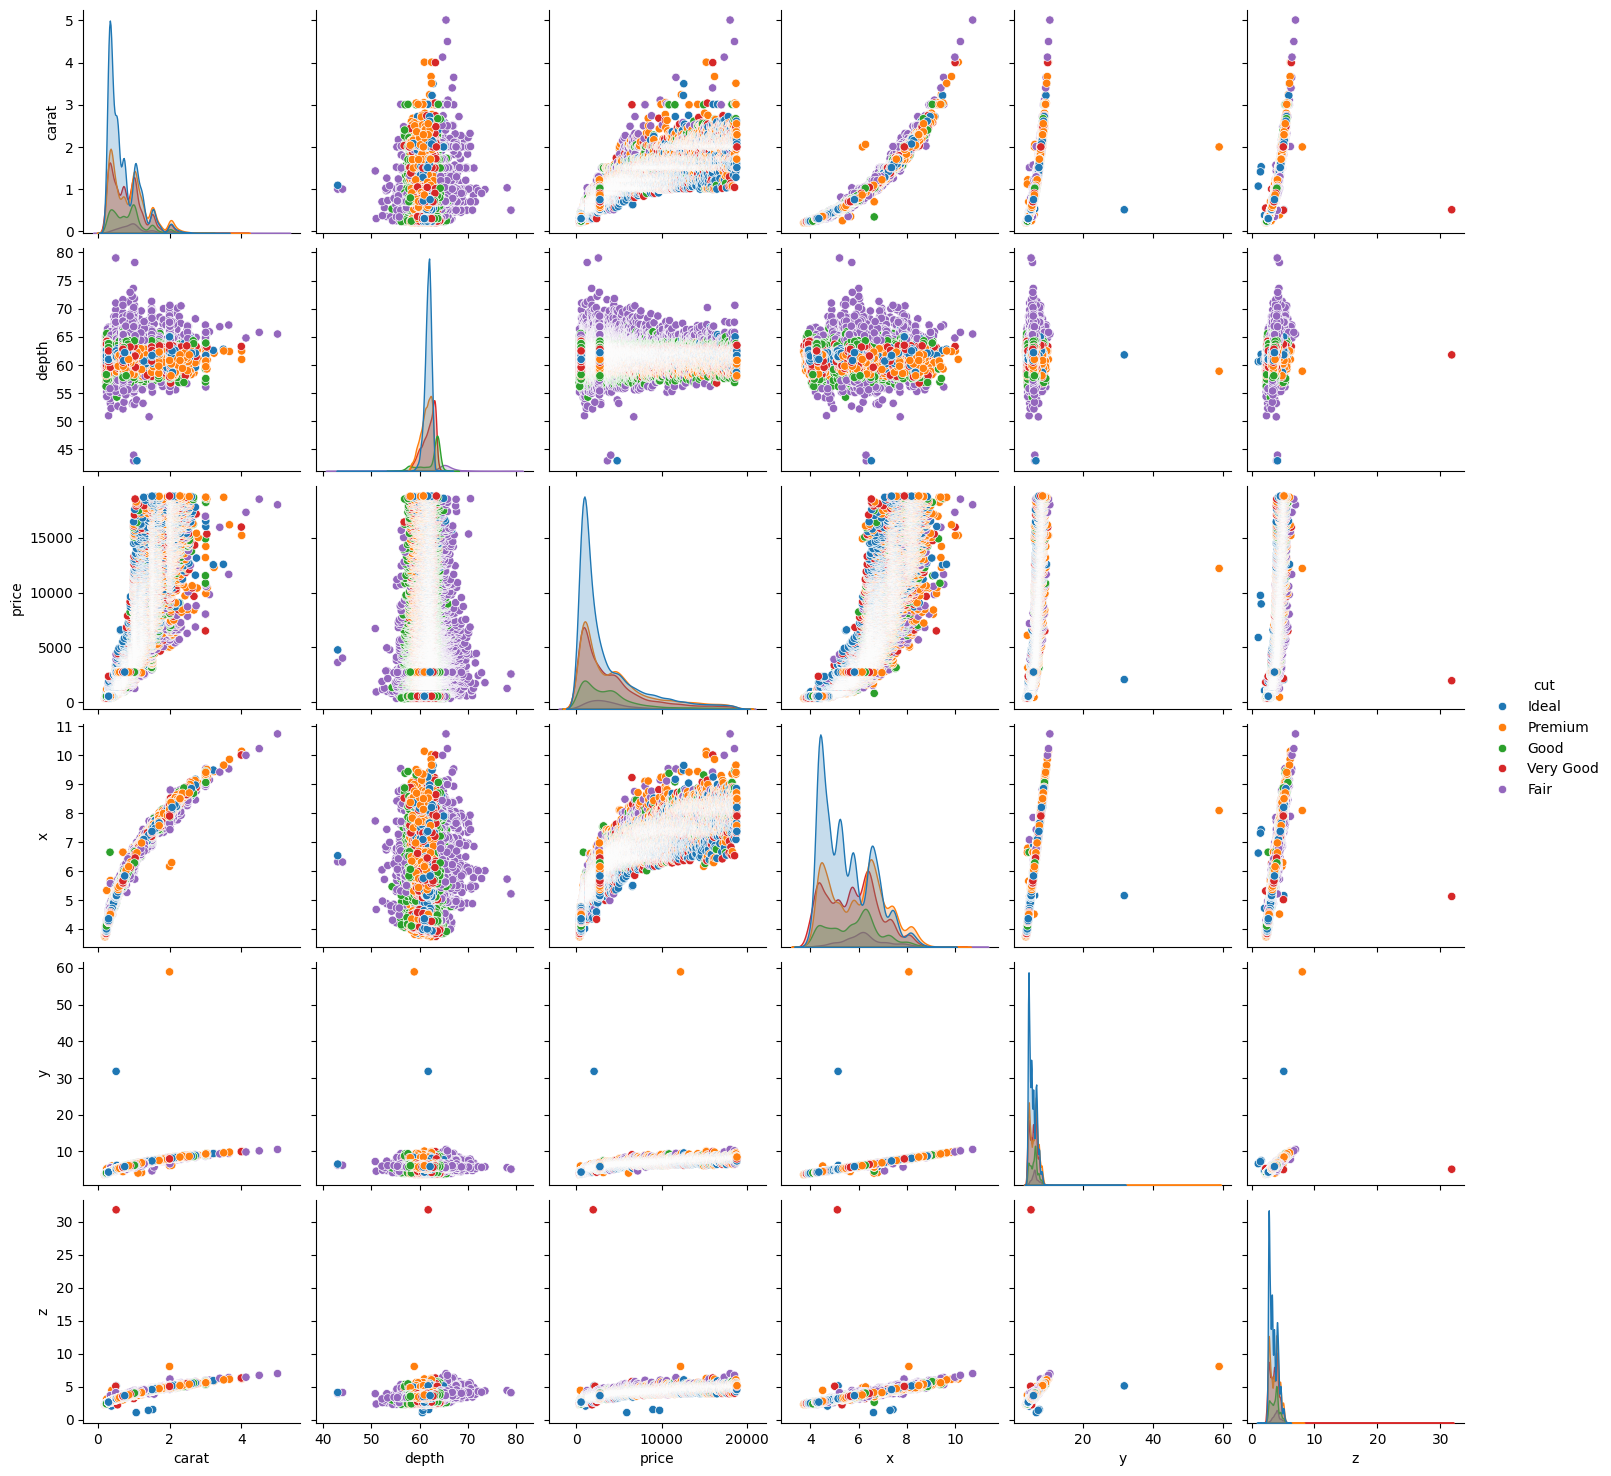

In [105]:
# Cette etape prend du temps en raison du nombre de graphe

columns_to_plot = ["carat", "depth", "price", "x", "y", "z", "cut"]
pairplot_data = data_df[columns_to_plot]
sns.pairplot(pairplot_data, hue="cut", diag_kind="kde", height=2.5)
plt.show()



Here are a few observations from the pair plots:

Some features contain data points that are significantly different from the rest of the dataset, which could impact the results of our regression model.

- The variables "y" and "z" have dimensional outliers in the dataset that need to be removed.

- The "depth" variable should likely be capped, but we need to inspect the regression line to confirm this.

- The "table" variable also appears to have outliers, so it should be capped as well.

Let's examine the regression plots to take a closer look at these outliers.

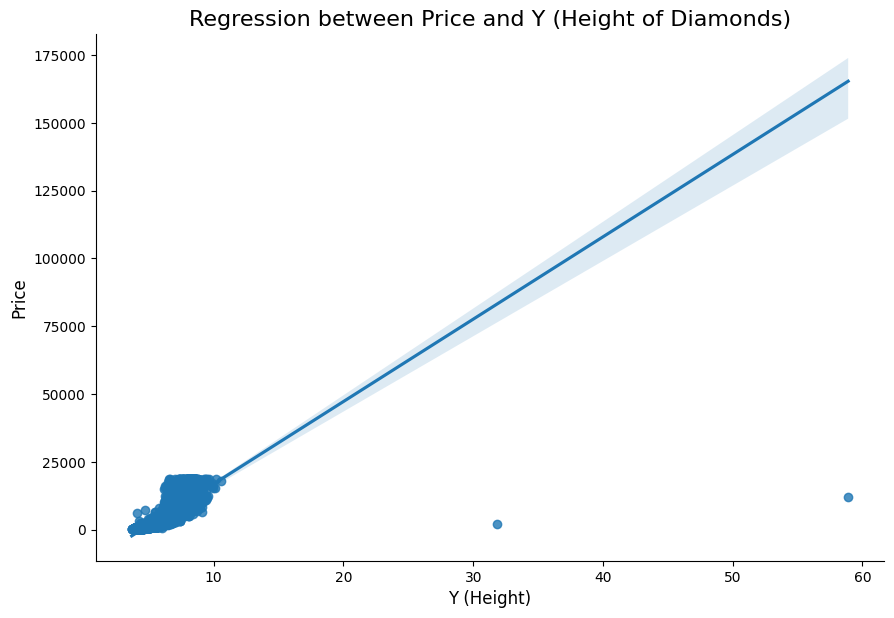

In [106]:
sns.lmplot(data=data_df, x="y", y="price", height=6, aspect=1.5)
plt.title("Regression between Price and Y (Height of Diamonds)", fontsize=16)
plt.xlabel("Y (Height)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()


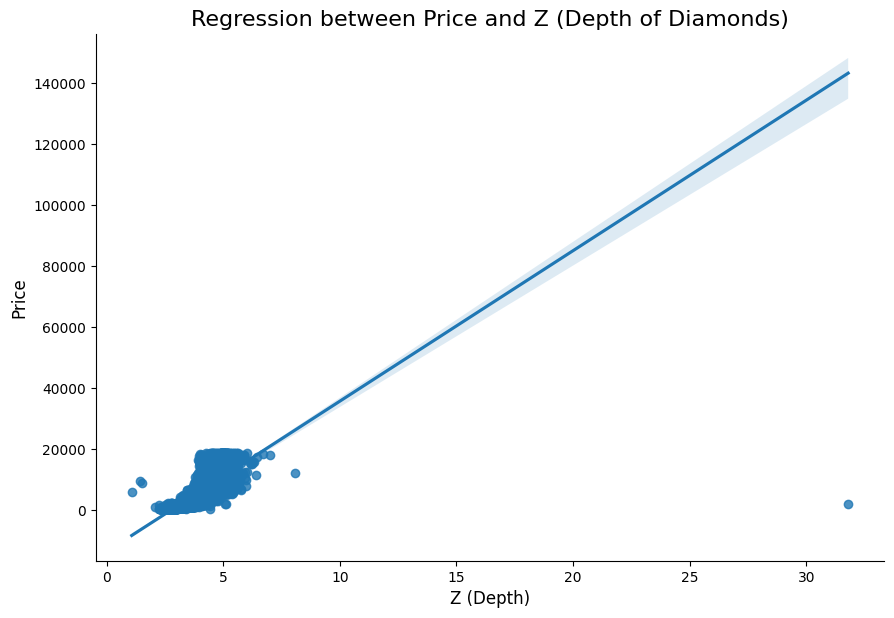

In [107]:
sns.lmplot(data=data_df, x="z", y="price", height=6, aspect=1.5)
plt.title("Regression between Price and Z (Depth of Diamonds)", fontsize=16)
plt.xlabel("Z (Depth)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

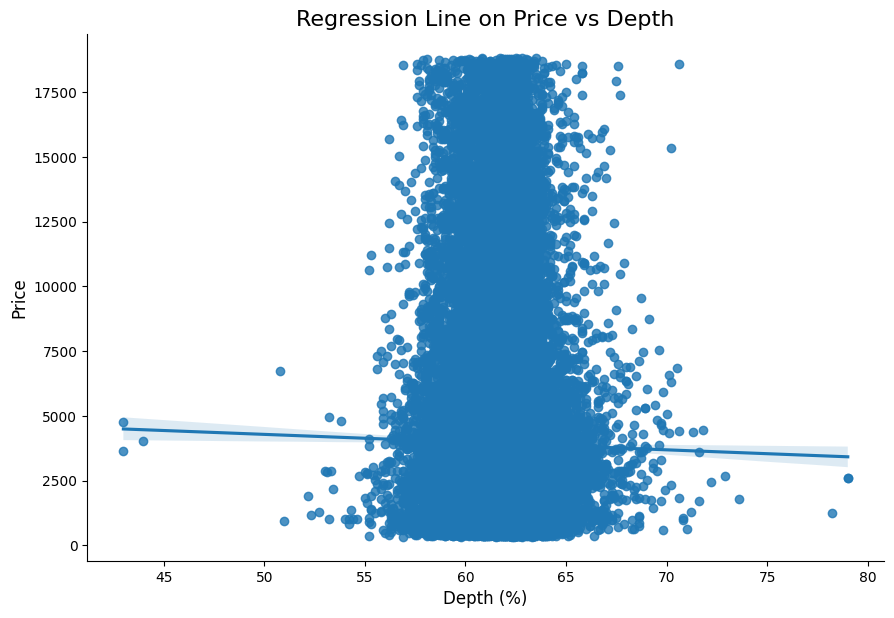

In [108]:
sns.lmplot(data=data_df, x="depth", y="price", height=6, aspect=1.5)
plt.title("Regression Line on Price vs Depth", fontsize=16)
plt.xlabel("Depth (%)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

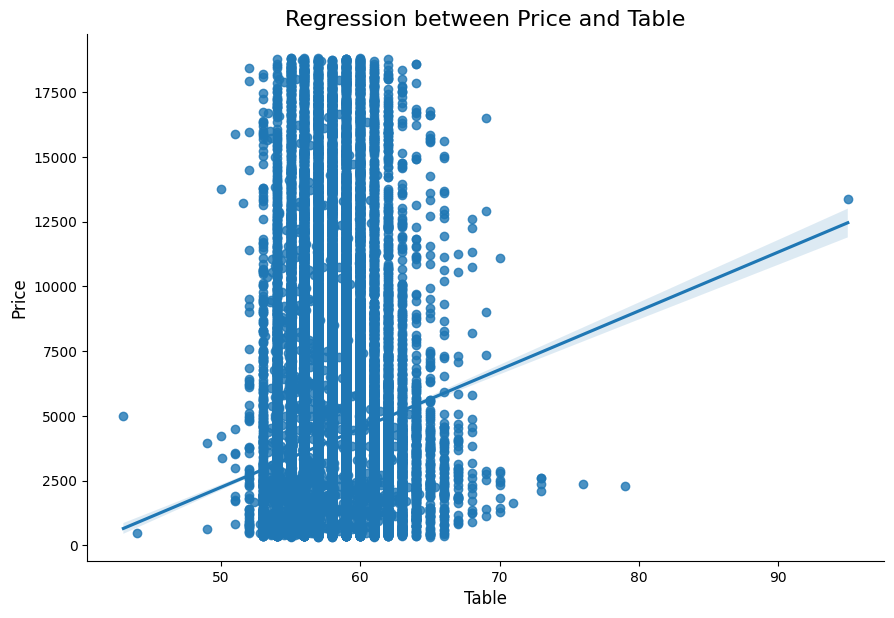

In [109]:
sns.lmplot(data=data_df, x="table", y="price", height=6, aspect=1.5)
plt.title("Regression between Price and Table", fontsize=16)
plt.xlabel("Table", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

In [110]:
data_df = data_df[(data_df["depth"] < 75) & (data_df["depth"] > 45)]
data_df = data_df[(data_df["table"] < 80) & (data_df["table"] > 40)]
data_df = data_df[(data_df["x"] < 30)]
data_df = data_df[(data_df["y"] < 30)]
data_df = data_df[(data_df["z"] < 30) & (data_df["z"] > 2)]
data_df.shape

(53907, 10)

So we have removed the data points that could have distorted  our models.


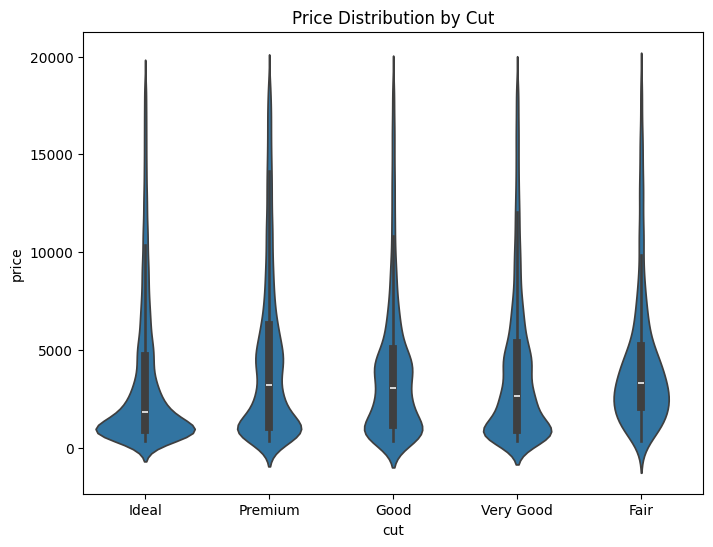

In [111]:
plt.figure(figsize=(8, 6))

sns.violinplot(x='cut', y='price', data=data_df)
plt.title('Price Distribution by Cut')
plt.show()

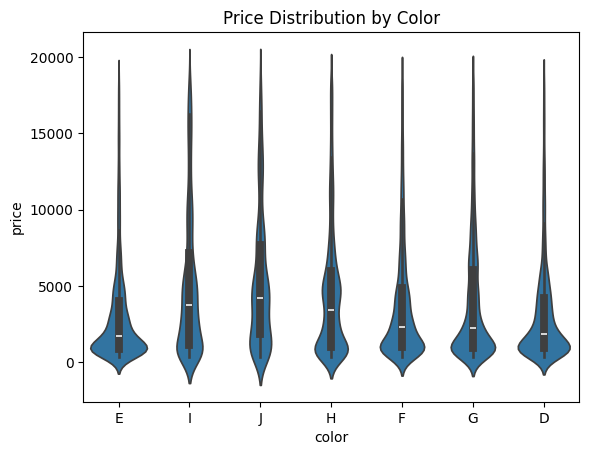

In [112]:
sns.violinplot(x='color', y='price', data=data_df)
plt.title('Price Distribution by Color')
plt.show()

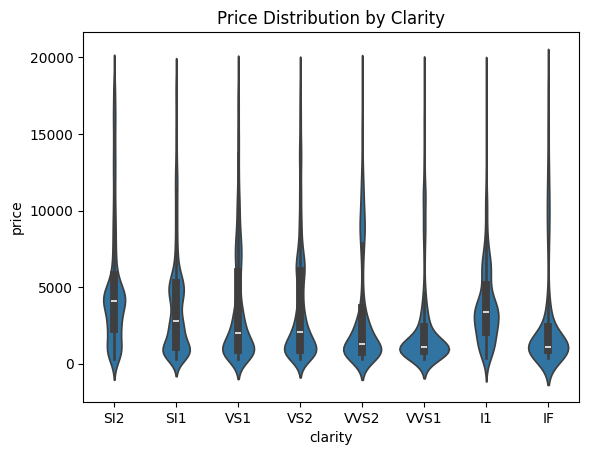

In [113]:
sns.violinplot(x='clarity', y='price', data=data_df)
plt.title('Price Distribution by Clarity')
plt.show()

In [114]:
data_df_copy = data_df.copy()


In [115]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_df_copy['cut'] = label_encoder.fit_transform(data_df_copy['cut'])
data_df_copy['color'] = label_encoder.fit_transform(data_df_copy['color'])
data_df_copy['clarity'] = label_encoder.fit_transform(data_df_copy['clarity'])
data_df_copy.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

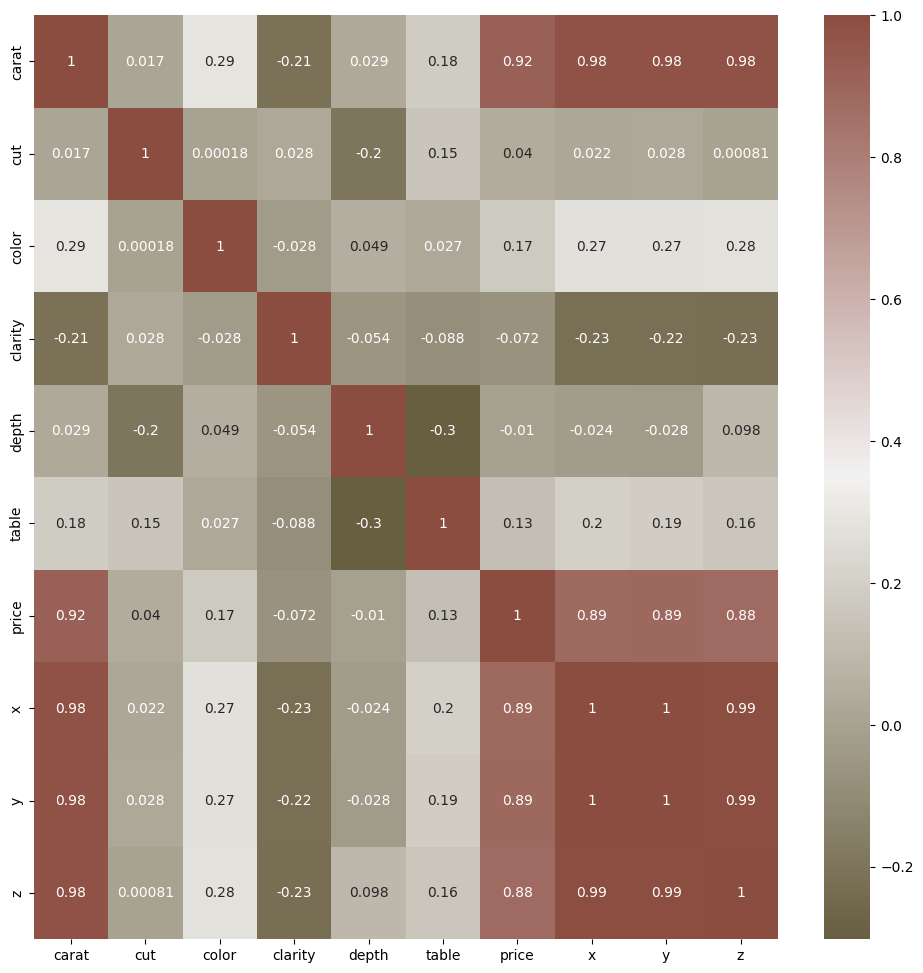

In [116]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= data_df_copy.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

We see the price seems corlated to carat, x, y and z

In general, we would expect a stronger relationship between the price and the color, or the price and the clarity of the diamonds. However, in this dataset, we only have diamonds of lower quality in terms of both color and clarity. As a result, there isn't a significant correlation, which suggests that our regression model may not be applicable to diamonds of higher quality.

In [184]:
from sklearn.model_selection import train_test_split

X = data_df_copy.drop(["price"], axis=1)
y = data_df_copy["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [119]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

R²: 0.8890
MAE: 849.3507
MSE: 1741183.6678


# Stage 2

In [120]:
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions avant amélioration
rf_pred_before = model.predict(X_test)


In [121]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)


In [186]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
X1_train, X1_test, y1_train, y1_test = X_train, X_test, y_train, y_test


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.612e+10, tolerance: 6.455e+07
  model = cd_fast.enet_coordinate_descent(


In [123]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.666e+10, tolerance: 6.455e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.612e+10, tolerance: 6.455e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.108e+10, tolerance: 6.455e

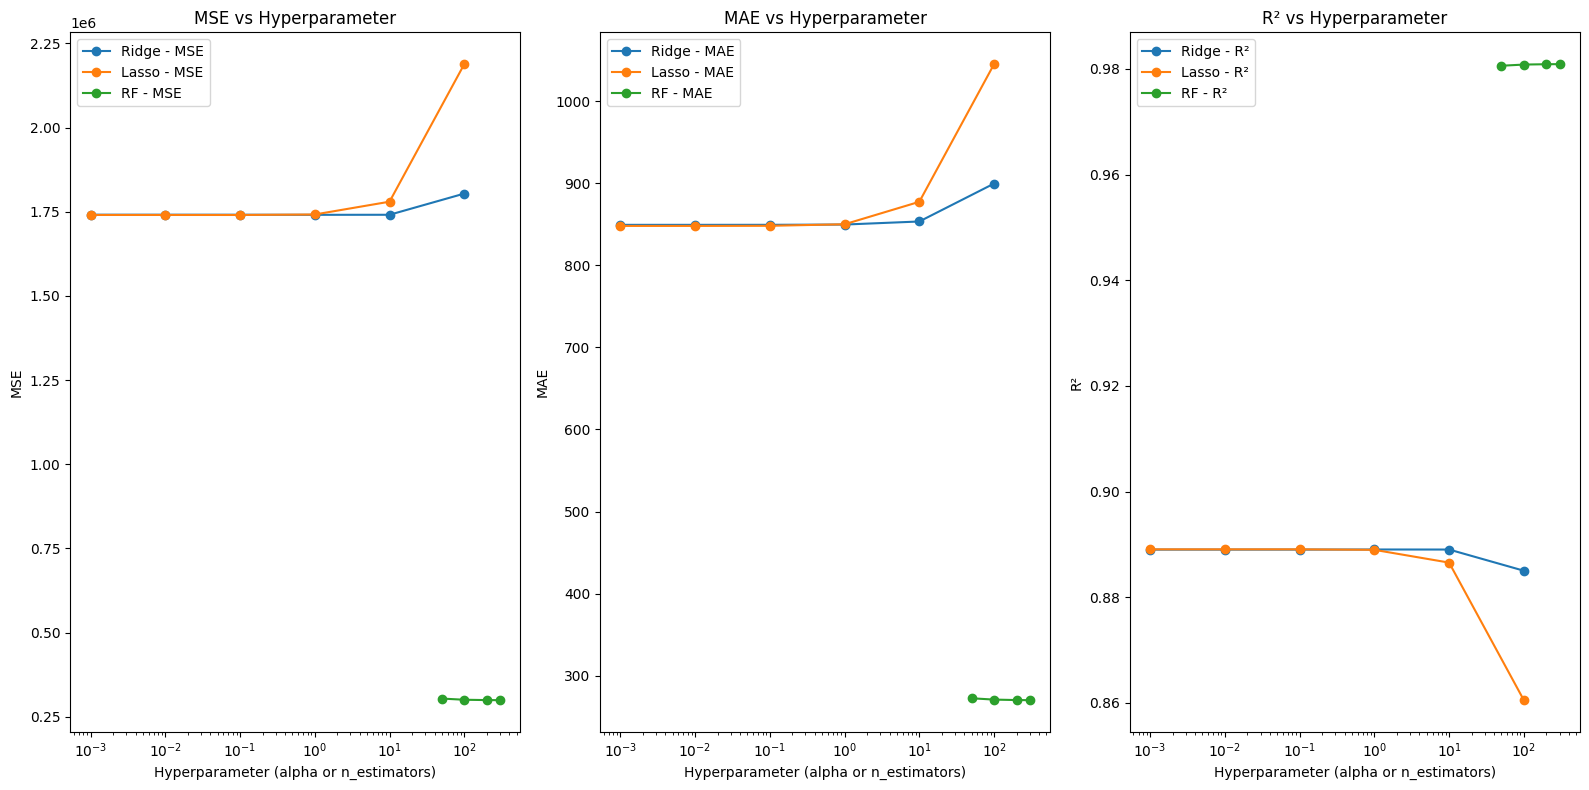

In [124]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# List of hyperparameters
alphas = [0.001, 0.01, 0.1, 1, 10, 100]  # For Ridge and Lasso
n_estimators_list = [50, 100, 200, 300]  # For Random Forest

# Storage for results
ridge_results = {'param': [], 'MSE': [], 'MAE': [], 'R2': []}
lasso_results = {'param': [], 'MSE': [], 'MAE': [], 'R2': []}
rf_results = {'param': [], 'MSE': [], 'MAE': [], 'R2': []}

# Ridge Regression
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_pred = ridge_model.predict(X_test)

    mse = mean_squared_error(y_test, ridge_pred)
    mae = mean_absolute_error(y_test, ridge_pred)
    r2 = r2_score(y_test, ridge_pred)

    ridge_results['param'].append(alpha)
    ridge_results['MSE'].append(mse)
    ridge_results['MAE'].append(mae)
    ridge_results['R2'].append(r2)

# Lasso Regression
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_pred = lasso_model.predict(X_test)

    mse = mean_squared_error(y_test, lasso_pred)
    mae = mean_absolute_error(y_test, lasso_pred)
    r2 = r2_score(y_test, lasso_pred)

    lasso_results['param'].append(alpha)
    lasso_results['MSE'].append(mse)
    lasso_results['MAE'].append(mae)
    lasso_results['R2'].append(r2)

# Random Forest Regressor
for n_estimators in n_estimators_list:
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    mse = mean_squared_error(y_test, rf_pred)
    mae = mean_absolute_error(y_test, rf_pred)
    r2 = r2_score(y_test, rf_pred)

    rf_results['param'].append(n_estimators)
    rf_results['MSE'].append(mse)
    rf_results['MAE'].append(mae)
    rf_results['R2'].append(r2)

# Visualization of results
plt.figure(figsize=(16, 8))

# MSE plot
plt.subplot(1, 3, 1)
plt.plot(ridge_results['param'], ridge_results['MSE'], label='Ridge - MSE', marker='o')
plt.plot(lasso_results['param'], lasso_results['MSE'], label='Lasso - MSE', marker='o')
plt.plot(rf_results['param'], rf_results['MSE'], label='RF - MSE', marker='o')
plt.xscale('log')
plt.xlabel('Hyperparameter (alpha or n_estimators)')
plt.ylabel('MSE')
plt.title('MSE vs Hyperparameter')
plt.legend()

# MAE plot
plt.subplot(1, 3, 2)
plt.plot(ridge_results['param'], ridge_results['MAE'], label='Ridge - MAE', marker='o')
plt.plot(lasso_results['param'], lasso_results['MAE'], label='Lasso - MAE', marker='o')
plt.plot(rf_results['param'], rf_results['MAE'], label='RF - MAE', marker='o')
plt.xscale('log')
plt.xlabel('Hyperparameter (alpha or n_estimators)')
plt.ylabel('MAE')
plt.title('MAE vs Hyperparameter')
plt.legend()

# R² plot
plt.subplot(1, 3, 3)
plt.plot(ridge_results['param'], ridge_results['R2'], label='Ridge - R²', marker='o')
plt.plot(lasso_results['param'], lasso_results['R2'], label='Lasso - R²', marker='o')
plt.plot(rf_results['param'], rf_results['R2'], label='RF - R²', marker='o')
plt.xscale('log')
plt.xlabel('Hyperparameter (alpha or n_estimators)')
plt.ylabel('R²')
plt.title('R² vs Hyperparameter')
plt.legend()

plt.tight_layout()
plt.show()


For alpha values below 1, the model does not converge, and the results remain the same for both Lasso and Ridge regression. The results begin to differ when alpha reaches 10, but in all cases, Random Forest appears to be the better model here.

 However now, we will now focus on Random Forest to observe which number of estimators is ideal.

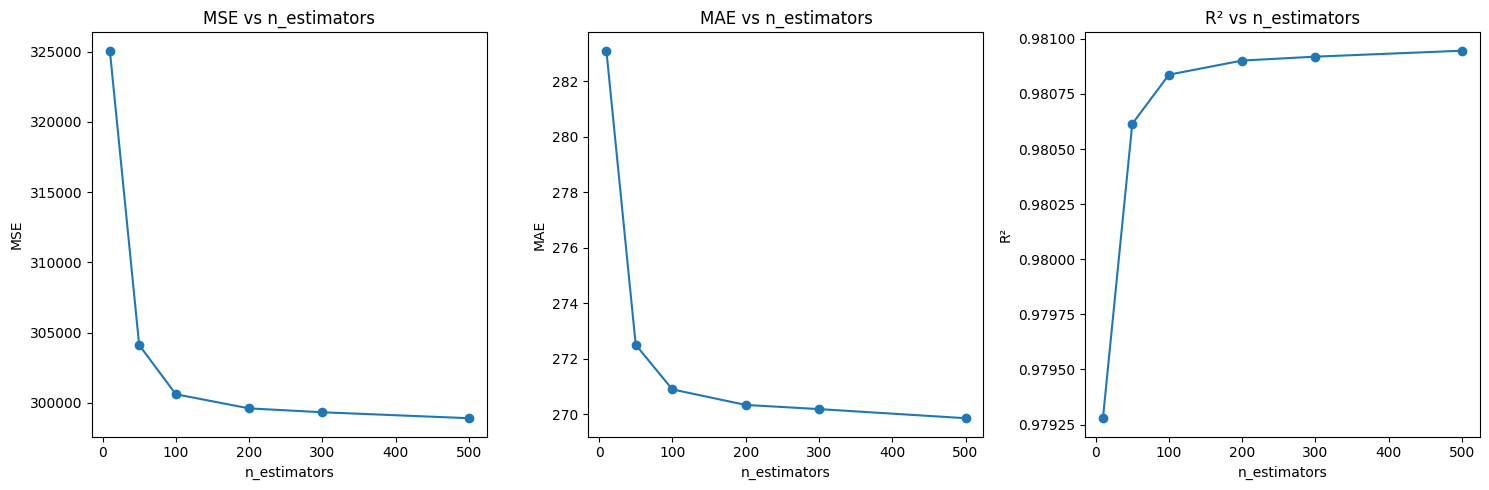

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# List of n_estimators values to test
n_estimators_range = [10, 50, 100, 200, 300, 500]

# Initialize lists to store results
mse_values = []
mae_values = []
r2_values = []

# Loop to test different n_estimators values
for n in n_estimators_range:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions on the test data
    rf_pred = rf_model.predict(X_test)

    # Compute metrics
    mse = mean_squared_error(y_test, rf_pred)
    mae = mean_absolute_error(y_test, rf_pred)
    r2 = r2_score(y_test, rf_pred)

    # Store results
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

# Visualize the results
plt.figure(figsize=(15, 5))

# MSE vs n_estimators
plt.subplot(1, 3, 1)
plt.plot(n_estimators_range, mse_values, marker='o')
plt.title('MSE vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('MSE')

# MAE vs n_estimators
plt.subplot(1, 3, 2)
plt.plot(n_estimators_range, mae_values, marker='o')
plt.title('MAE vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('MAE')

# R² vs n_estimators
plt.subplot(1, 3, 3)
plt.plot(n_estimators_range, r2_values, marker='o')
plt.title('R² vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('R²')

plt.tight_layout()
plt.show()


From 200 repetitions onwards, the results converge. We will therefore choose this as the maximum value for the model tunning.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

param_distributions = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

rf_model = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

rf_best_model = random_search.best_estimator_

rf_pred = rf_best_model.predict(X_test)

mse = mean_squared_error(y_test, rf_pred)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print(f"Best Parameters: {best_params}")
print(f"Best CV Score (MSE): {best_score}")
print(f"MSE on Test Set: {mse}")
print(f"MAE on Test Set: {mae}")
print(f"R² on Test Set: {r2}")


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None}
Best CV Score (MSE): -296303.88228855445
MSE on Test Set: 300021.42995243944
MAE on Test Set: 271.47722338246746
R² on Test Set: 0.9808755232778517


In [148]:
rf_best_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features=None,
    random_state=42
)

rf_best_model.fit(X_train, y_train)

rf_pred = rf_best_model.predict(X_test)

mse = mean_squared_error(y_test, rf_pred)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print(f"MSE on Test Set: {mse}")
print(f"MAE on Test Set: {mae}")
print(f"R² on Test Set: {r2}")


MSE on Test Set: 300021.42995243944
MAE on Test Set: 271.47722338246746
R² on Test Set: 0.9808755232778517


In [149]:
# Function to plot and compare predictions with actual values
def plot_reality_vs_prediction_comparison(y_test, rf_pred_before, rf_pred_after):
    # Define axis limits by rounding up to the nearest multiple of 2500
    max_value = max(np.max(y_test), np.max(rf_pred_before), np.max(rf_pred_after))
    max_limit = (int(max_value // 2500) + 1) * 2500

    plt.figure(figsize=(12, 6))

    # Before improvement
    ax1 = plt.subplot(1, 2, 1)
    ax1.scatter(y_test, rf_pred_before, alpha=0.6, label="Before", color="blue")
    ax1.plot([0, max_limit], [0, max_limit], 'r--', label="Ideal")
    ax1.set_title("Reality vs Prediction (Before)")
    ax1.set_xlabel("Actual")
    ax1.set_ylabel("Predicted")
    ax1.set_xlim(0, max_limit)
    ax1.set_ylim(0, max_limit)
    ax1.set_xticks(np.arange(0, max_limit + 1, 2500))
    ax1.set_yticks(np.arange(0, max_limit + 1, 2500))
    ax1.set_xticks(np.arange(0, max_limit + 1, 5000))
    ax1.set_yticks(np.arange(0, max_limit + 1, 5000))
    ax1.set_aspect('equal', adjustable='box')
    ax1.grid(True, which='both', linestyle='--', alpha=0.7)
    ax1.legend()

    # After improvement
    ax2 = plt.subplot(1, 2, 2)
    ax2.scatter(y_test, rf_pred_after, alpha=0.6, label="After", color="orange")
    ax2.plot([0, max_limit], [0, max_limit], 'r--', label="Ideal")
    ax2.set_title("Reality vs Prediction (After)")
    ax2.set_xlabel("Actual")
    ax2.set_ylabel("Predicted")
    ax2.set_xlim(0, max_limit)
    ax2.set_ylim(0, max_limit)
    ax2.set_xticks(np.arange(0, max_limit + 1, 2500))
    ax2.set_yticks(np.arange(0, max_limit + 1, 2500))
    ax2.set_xticks(np.arange(0, max_limit + 1, 5000))
    ax2.set_yticks(np.arange(0, max_limit + 1, 5000))
    ax2.set_aspect('equal', adjustable='box')
    ax2.grid(True, which='both', linestyle='--', alpha=0.7)
    ax2.legend()

    plt.tight_layout()
    plt.show()



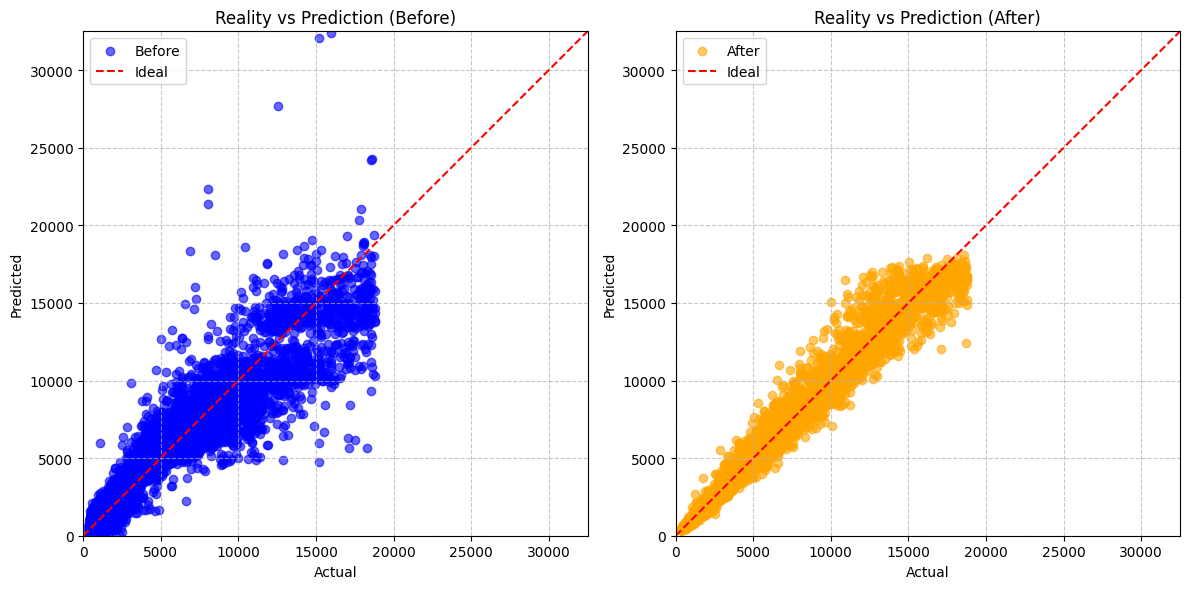

In [150]:
plot_reality_vs_prediction_comparison(y_test, rf_pred_before, rf_pred)


# Stage 3

Now that we have a model that appears to perform well across all data points, we will examine the performance for each color individually. This will allow us to identify where the model performs better or worse, and help us understand why this might be the case. If necessary, we will explore ways to address these issues and improve the model's accuracy for specific colors.

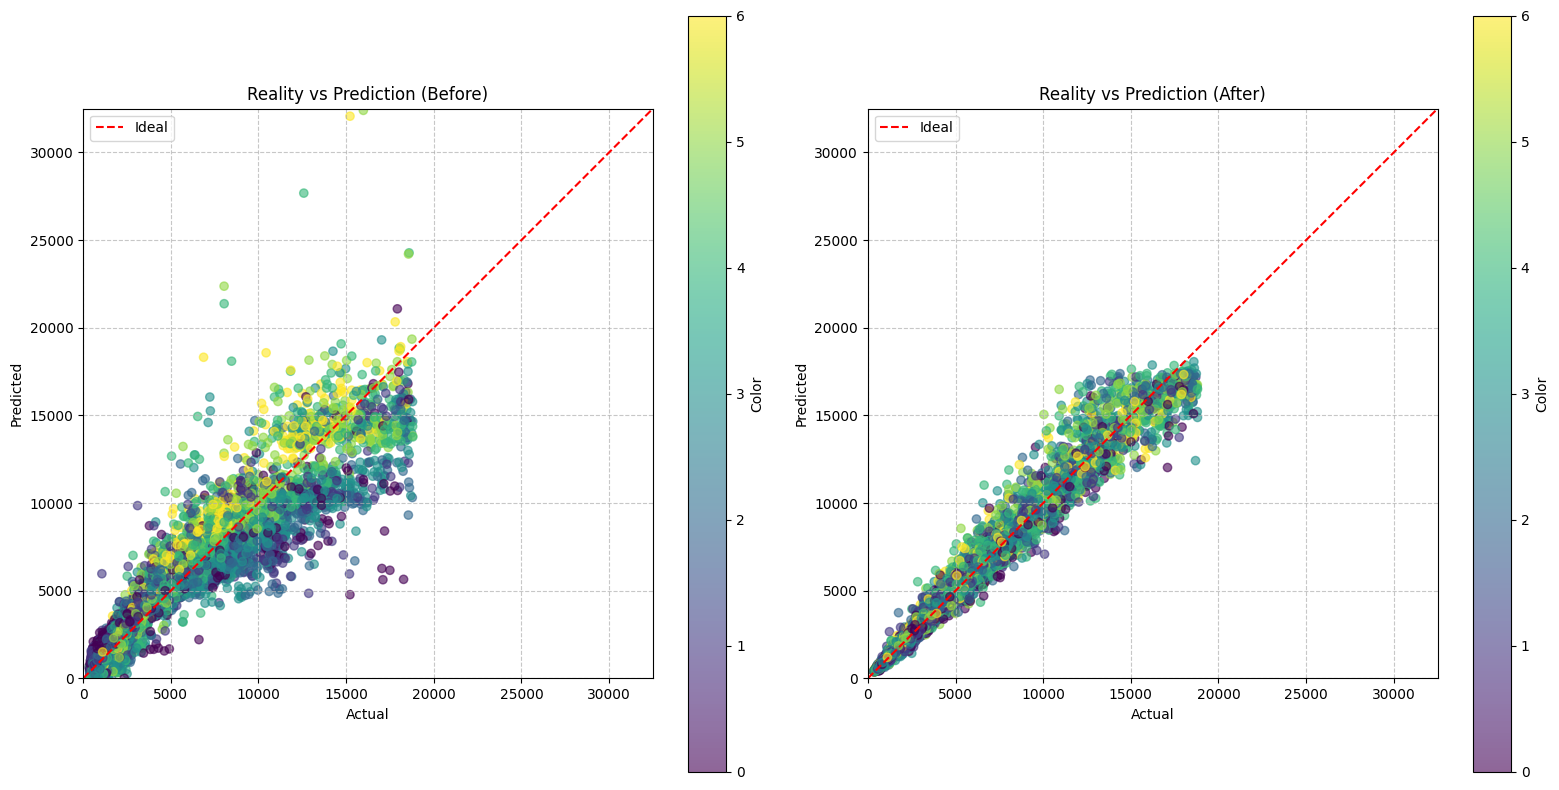

Color: 0, MAE Before: 827.1382, MAE After: 228.3327
Color: 2, MAE Before: 801.5089, MAE After: 243.2335
Color: 1, MAE Before: 759.3327, MAE After: 201.0318
Color: 3, MAE Before: 903.3663, MAE After: 262.8875
Color: 4, MAE Before: 835.5063, MAE After: 354.5490
Color: 5, MAE Before: 865.8058, MAE After: 352.7725
Color: 6, MAE Before: 1163.1965, MAE After: 357.0457


In [151]:
# Function to plot and compare predictions with reality, including groups (color/clarity/cut)
def plot_reality_vs_prediction_comparison_with_groups(y_test, rf_pred_before, rf_pred_after, df_test):
    # Set the axis limits by rounding up to the next multiple of 5000
    max_value = max(np.max(y_test), np.max(rf_pred_before), np.max(rf_pred_after))
    max_limit = (int(max_value // 2500) + 1) * 2500

    plt.figure(figsize=(16, 8))

    # Before improvement
    ax1 = plt.subplot(1, 2, 1)
    scatter = ax1.scatter(y_test, rf_pred_before, c=df_test['color'], cmap='viridis', alpha=0.6)
    ax1.plot([0, max_limit], [0, max_limit], 'r--', label="Ideal")
    ax1.set_title("Reality vs Prediction (Before)")
    ax1.set_xlabel("Actual")
    ax1.set_ylabel("Predicted")
    ax1.set_xlim(0, max_limit)
    ax1.set_ylim(0, max_limit)
    ax1.set_xticks(np.arange(0, max_limit + 1, 2500))
    ax1.set_yticks(np.arange(0, max_limit + 1, 2500))
    ax1.set_xticks(np.arange(0, max_limit + 1, 5000))  # Display every second tick on x-axis
    ax1.set_yticks(np.arange(0, max_limit + 1, 5000))  # Display every second tick on y-axis

    ax1.set_aspect('equal', adjustable='box')
    ax1.grid(True, which='both', linestyle='--', alpha=0.7)
    ax1.legend()
    plt.colorbar(scatter, ax=ax1, label='Color')

    # After improvement
    ax2 = plt.subplot(1, 2, 2)
    scatter = ax2.scatter(y_test, rf_pred_after, c=df_test['color'], cmap='viridis', alpha=0.6)
    ax2.plot([0, max_limit], [0, max_limit], 'r--', label="Ideal")
    ax2.set_title("Reality vs Prediction (After)")
    ax2.set_xlabel("Actual")
    ax2.set_ylabel("Predicted")
    ax2.set_xlim(0, max_limit)
    ax2.set_ylim(0, max_limit)
    ax2.set_xticks(np.arange(0, max_limit + 1, 2500))
    ax2.set_yticks(np.arange(0, max_limit + 1, 2500))
    ax2.set_xticks(np.arange(0, max_limit + 1, 5000))  # Display every second tick on x-axis
    ax2.set_yticks(np.arange(0, max_limit + 1, 5000))  # Display every second tick on y-axis
    ax2.set_aspect('equal', adjustable='box')
    ax2.grid(True, which='both', linestyle='--', alpha=0.7)
    ax2.legend()
    plt.colorbar(scatter, ax=ax2, label='Color')

    plt.tight_layout()
    plt.show()

    # Group analysis (e.g., by color)
    colors = df_test['color'].unique()
    for color in colors:
        color_mask = df_test['color'] == color
        mae_before = mean_absolute_error(y_test[color_mask], rf_pred_before[color_mask])
        mae_after = mean_absolute_error(y_test[color_mask], rf_pred_after[color_mask])
        print(f"Color: {color}, MAE Before: {mae_before:.4f}, MAE After: {mae_after:.4f}")

# Example function call with data
plot_reality_vs_prediction_comparison_with_groups(y_test, rf_pred_before, rf_pred, X_test)


After this graph, we don't immediately notice any specific colors for which the model performs worse. Therefore, we will compare the evolution of the metrics to observe this more precisely.

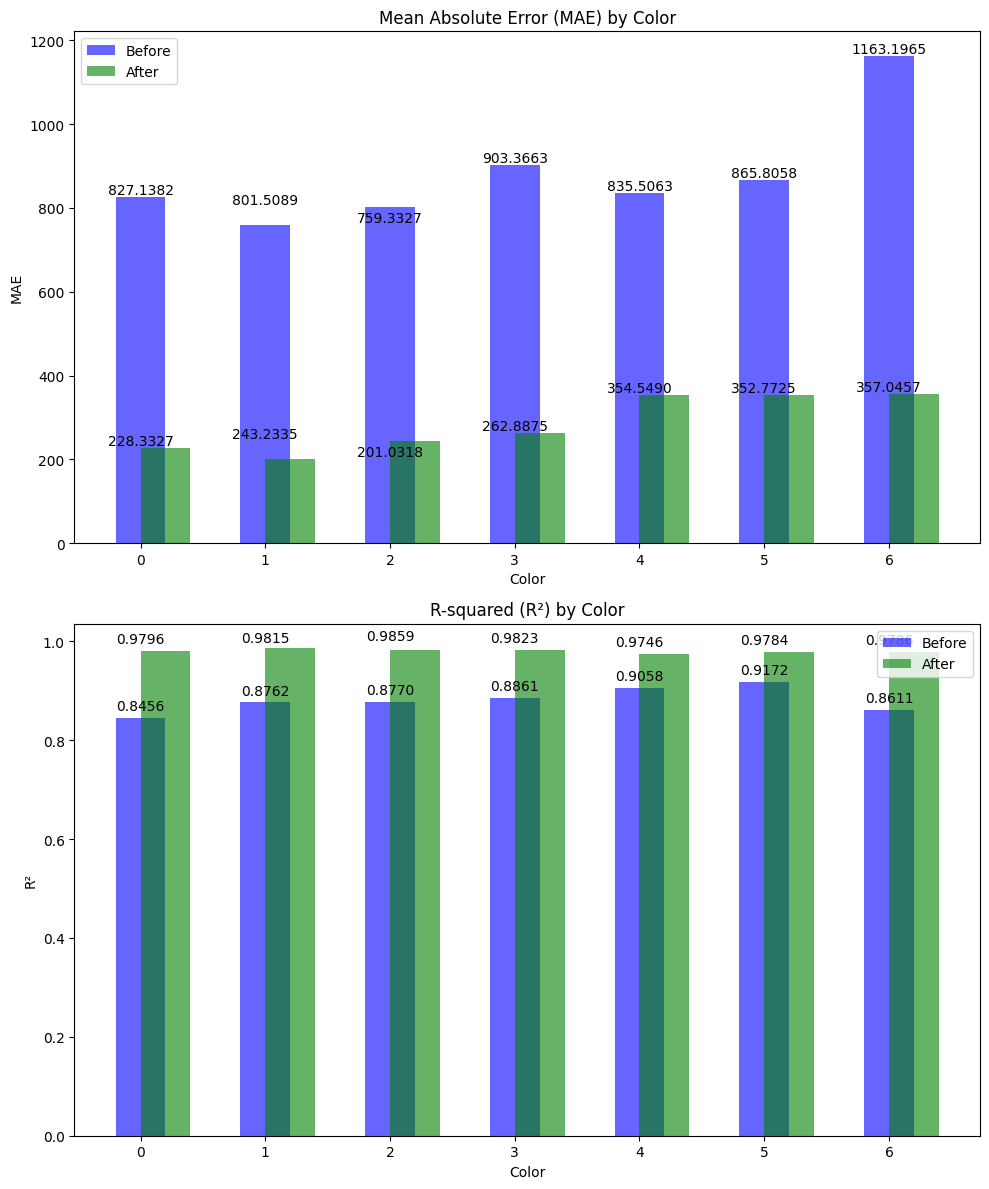

In [152]:
# Function to plot and compare the model's metrics by color
def plot_metrics_by_color(y_test, rf_pred_before, rf_pred_after, df_test):
    # Create a list of unique colors
    colors = df_test['color'].unique()

    # Create empty lists to store the metrics
    mae_before_list = []
    mae_after_list = []
    r2_before_list = []
    r2_after_list = []

    # Iterate through each color and calculate the metrics
    for color in colors:
        color_mask = df_test['color'] == color

        mae_before = mean_absolute_error(y_test[color_mask], rf_pred_before[color_mask])
        mae_after = mean_absolute_error(y_test[color_mask], rf_pred_after[color_mask])
        r2_before = r2_score(y_test[color_mask], rf_pred_before[color_mask])
        r2_after = r2_score(y_test[color_mask], rf_pred_after[color_mask])

        mae_before_list.append(mae_before)
        mae_after_list.append(mae_after)
        r2_before_list.append(r2_before)
        r2_after_list.append(r2_after)

    # Create subplots for MAE and R-squared comparison
    fig, axes = plt.subplots(2, 1, figsize=(10, 12))

    # Plot MAE before and after improvement
    axes[0].bar(colors, mae_before_list, alpha=0.6, label="Before", color='blue', width=0.4, align='center')
    axes[0].bar(colors, mae_after_list, alpha=0.6, label="After", color='green', width=0.4, align='edge')
    axes[0].set_title("Mean Absolute Error (MAE) by Color")
    axes[0].set_xlabel("Color")
    axes[0].set_ylabel("MAE")
    axes[0].legend()

    # Add the values on top of the bars
    for i, (mae_before, mae_after) in enumerate(zip(mae_before_list, mae_after_list)):
        axes[0].text(i, mae_before + 0.01, f'{mae_before:.4f}', ha='center', va='bottom', fontsize=10)
        axes[0].text(i, mae_after + 0.01, f'{mae_after:.4f}', ha='center', va='bottom', fontsize=10)

    # Plot R-squared before and after improvement
    axes[1].bar(colors, r2_before_list, alpha=0.6, label="Before", color='blue', width=0.4, align='center')
    axes[1].bar(colors, r2_after_list, alpha=0.6, label="After", color='green', width=0.4, align='edge')
    axes[1].set_title("R-squared (R²) by Color")
    axes[1].set_xlabel("Color")
    axes[1].set_ylabel("R²")
    axes[1].legend()

    # Add the values on top of the bars
    for i, (r2_before, r2_after) in enumerate(zip(r2_before_list, r2_after_list)):
        axes[1].text(i, r2_before + 0.01, f'{r2_before:.4f}', ha='center', va='bottom', fontsize=10)
        axes[1].text(i, r2_after + 0.01, f'{r2_after:.4f}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

# Example function call with data
plot_metrics_by_color(y_test, rf_pred_before, rf_pred, X_test)


Thanks to these graphs, we can observe that, while the results have significantly improved in a consistent manner, there is a slight decline in performance for colors 4 and above. This indicates that, despite the overall enhancement, the model might be struggling with higher color categories. We will now investigate the underlying reasons for this issue and explore potential ways to further improve the model in order to address this discrepancy. This might involve analyzing the data distribution, reviewing feature importance, or fine-tuning the model parameters to better capture the nuances of the higher color values.

To address this, we will begin by plotting the same graph as before, but this time separating the colors into two categories: colors 0 to 3 and colors 4 to 6. This will allow us to better understand the specific performance differences between these two groups and identify whether the model's accuracy varies significantly between them. By examining the predictions for these two categories separately, we can gain insights into the model's behavior and determine if targeted improvements can be made for the higher color range.

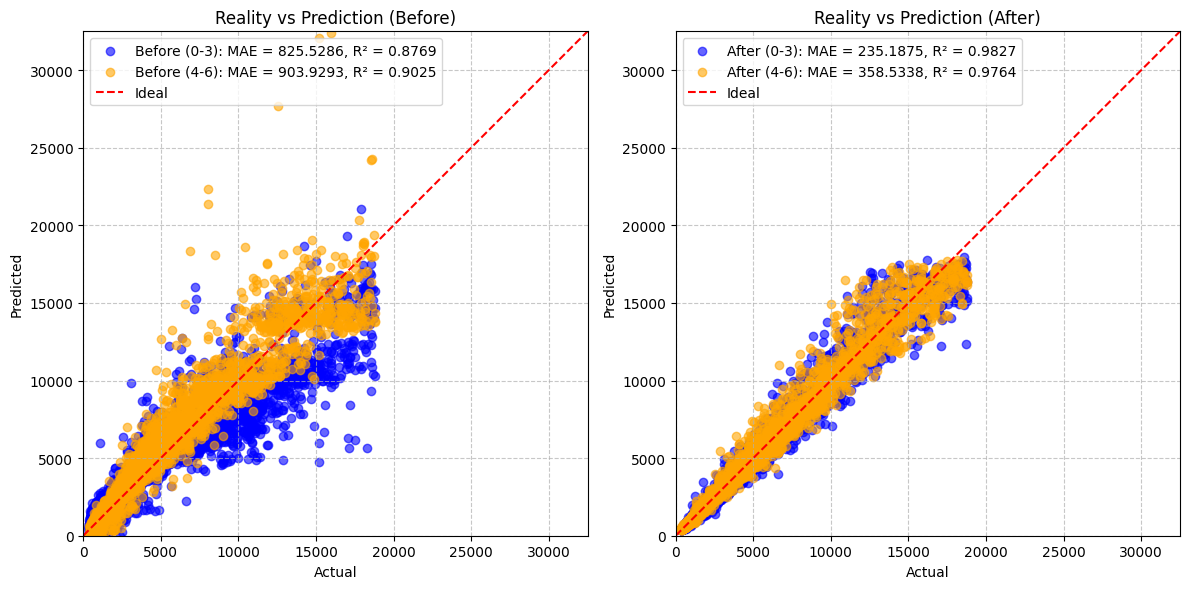

In [163]:
from sklearn.metrics import mean_absolute_error, r2_score

# Function to plot and compare predictions with actual values, displaying two groups with different colors
def plot_reality_vs_prediction_comparison(y_test, rf_pred_before, rf_pred_after, df_test):
    # Define axis limits by rounding up to the nearest multiple of 2500
    max_value = max(np.max(y_test), np.max(rf_pred_before), np.max(rf_pred_after))
    max_limit = (int(max_value // 2500) + 1) * 2500

    # Define groups for colors 0-3 and 4-6
    colors_group_0_3 = df_test['color'].isin([0, 1, 2, 3])
    colors_group_4_6 = df_test['color'].isin([4, 5, 6])

    # Calculate MAE and R² for both groups and both predictions (before and after improvement)
    mae_before_0_3 = mean_absolute_error(y_test[colors_group_0_3], rf_pred_before[colors_group_0_3])
    r2_before_0_3 = r2_score(y_test[colors_group_0_3], rf_pred_before[colors_group_0_3])

    mae_before_4_6 = mean_absolute_error(y_test[colors_group_4_6], rf_pred_before[colors_group_4_6])
    r2_before_4_6 = r2_score(y_test[colors_group_4_6], rf_pred_before[colors_group_4_6])

    mae_after_0_3 = mean_absolute_error(y_test[colors_group_0_3], rf_pred_after[colors_group_0_3])
    r2_after_0_3 = r2_score(y_test[colors_group_0_3], rf_pred_after[colors_group_0_3])

    mae_after_4_6 = mean_absolute_error(y_test[colors_group_4_6], rf_pred_after[colors_group_4_6])
    r2_after_4_6 = r2_score(y_test[colors_group_4_6], rf_pred_after[colors_group_4_6])

    plt.figure(figsize=(12, 6))

    # Before improvement
    ax1 = plt.subplot(1, 2, 1)
    ax1.scatter(y_test[colors_group_0_3], rf_pred_before[colors_group_0_3], alpha=0.6, label=f"Before (0-3): MAE = {mae_before_0_3:.4f}, R² = {r2_before_0_3:.4f}", color="blue")
    ax1.scatter(y_test[colors_group_4_6], rf_pred_before[colors_group_4_6], alpha=0.6, label=f"Before (4-6): MAE = {mae_before_4_6:.4f}, R² = {r2_before_4_6:.4f}", color="orange")
    ax1.plot([0, max_limit], [0, max_limit], 'r--', label="Ideal")
    ax1.set_title("Reality vs Prediction (Before)")
    ax1.set_xlabel("Actual")
    ax1.set_ylabel("Predicted")
    ax1.set_xlim(0, max_limit)
    ax1.set_ylim(0, max_limit)
    ax1.set_xticks(np.arange(0, max_limit + 1, 2500))
    ax1.set_yticks(np.arange(0, max_limit + 1, 2500))
    ax1.set_xticks(np.arange(0, max_limit + 1, 5000))
    ax1.set_yticks(np.arange(0, max_limit + 1, 5000))
    ax1.set_aspect('equal', adjustable='box')
    ax1.grid(True, which='both', linestyle='--', alpha=0.7)
    ax1.legend()

    # After improvement
    ax2 = plt.subplot(1, 2, 2)
    ax2.scatter(y_test[colors_group_0_3], rf_pred_after[colors_group_0_3], alpha=0.6, label=f"After (0-3): MAE = {mae_after_0_3:.4f}, R² = {r2_after_0_3:.4f}", color="blue")
    ax2.scatter(y_test[colors_group_4_6], rf_pred_after[colors_group_4_6], alpha=0.6, label=f"After (4-6): MAE = {mae_after_4_6:.4f}, R² = {r2_after_4_6:.4f}", color="orange")
    ax2.plot([0, max_limit], [0, max_limit], 'r--', label="Ideal")
    ax2.set_title("Reality vs Prediction (After)")
    ax2.set_xlabel("Actual")
    ax2.set_ylabel("Predicted")
    ax2.set_xlim(0, max_limit)
    ax2.set_ylim(0, max_limit)
    ax2.set_xticks(np.arange(0, max_limit + 1, 2500))
    ax2.set_yticks(np.arange(0, max_limit + 1, 2500))
    ax2.set_xticks(np.arange(0, max_limit + 1, 5000))
    ax2.set_yticks(np.arange(0, max_limit + 1, 5000))
    ax2.set_aspect('equal', adjustable='box')
    ax2.grid(True, which='both', linestyle='--', alpha=0.7)
    ax2.legend()

    plt.tight_layout()
    plt.show()

plot_reality_vs_prediction_comparison(y_test, rf_pred_before, rf_pred_after, X_test)


By plotting this graph, we observe that the outliers indeed belong to our second color group (4-6). This may explain why, even after optimizing the model, the results are slightly less accurate. These outliers might be influencing the overall performance, making it more challenging for the model to provide precise predictions in this group.

However, after optimization, we don't see a significant difference in the predictions. While there is some improvement, it is less pronounced, particularly in the second group (4-6). This suggests that the optimization has made some progress, but the impact on predictions for this group remains relatively modest, likely due to the influence of the outliers.

We will proceed by testing and comparing four models: Linear Regression, Decision Tree, Random Forest, and K-Nearest Neighbors. These models are particularly promising for handling outliers, as they each have unique strengths in dealing with extreme values. By assessing their performance, we aim to identify the model that can most effectively manage and correct these aberrant data points, which could potentially improve the overall predictions. This comparison will allow us to determine which model provides the best solution for addressing the outliers and refining the accuracy of the predictions.

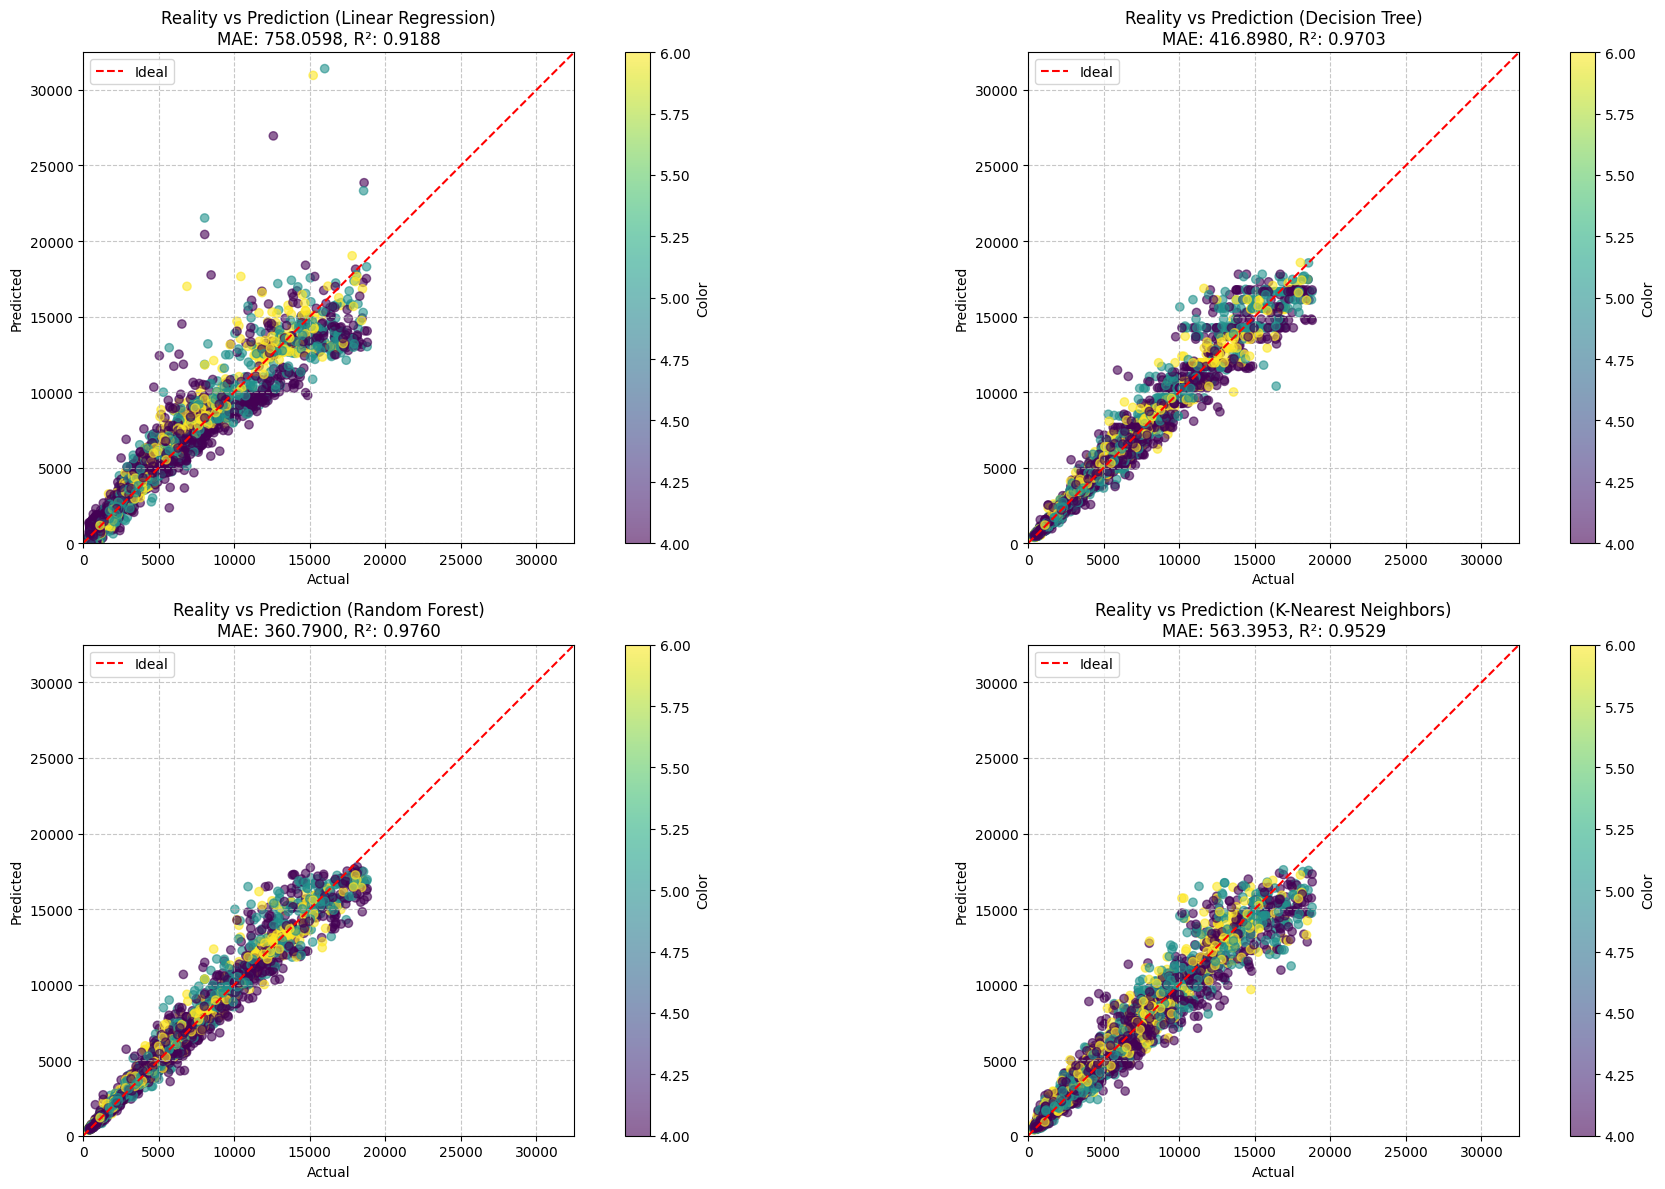

In [158]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Filter data for colors 4, 5, and 6
df_filtered_train = X_train[(X_train['color'] == 4) | (X_train['color'] == 5) | (X_train['color'] == 6)]
y_filtered_train = y_train[df_filtered_train.index]

df_filtered_test = X_test[(X_test['color'] == 4) | (X_test['color'] == 5) | (X_test['color'] == 6)]
y_filtered_test = y_test[df_filtered_test.index]

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(df_filtered_train, y_filtered_train)
lr_pred = lr_model.predict(df_filtered_test)
mae_lr = mean_absolute_error(y_filtered_test, lr_pred)
r2_lr = r2_score(y_filtered_test, lr_pred)

# Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
dt_model.fit(df_filtered_train, y_filtered_train)
dt_pred = dt_model.predict(df_filtered_test)
mae_dt = mean_absolute_error(y_filtered_test, dt_pred)
r2_dt = r2_score(y_filtered_test, dt_pred)

# Optimized Random Forest model
rf_best_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features=None,
    random_state=42
)
rf_best_model.fit(df_filtered_train, y_filtered_train)
rf_pred = rf_best_model.predict(df_filtered_test)
mae_rf = mean_absolute_error(y_filtered_test, rf_pred)
r2_rf = r2_score(y_filtered_test, rf_pred)

# K-Nearest Neighbors model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(df_filtered_train, y_filtered_train)
knn_pred = knn_model.predict(df_filtered_test)
mae_knn = mean_absolute_error(y_filtered_test, knn_pred)
r2_knn = r2_score(y_filtered_test, knn_pred)

# Set the axis limits by rounding up to the next multiple of 5000
max_value = max(np.max(y_filtered_test), np.max(lr_pred), np.max(dt_pred), np.max(rf_pred), np.max(knn_pred))
max_limit = (int(max_value // 2500) + 1) * 2500

# Plot the results
plt.figure(figsize=(20, 12))

# Linear Regression results
ax1 = plt.subplot(2, 2, 1)
scatter_lr = ax1.scatter(y_filtered_test, lr_pred, c=df_filtered_test['color'], cmap='viridis', alpha=0.6)
ax1.plot([0, max_limit], [0, max_limit], 'r--', label="Ideal")
ax1.set_title(f"Reality vs Prediction (Linear Regression)\nMAE: {mae_lr:.4f}, R²: {r2_lr:.4f}")
ax1.set_xlabel("Actual")
ax1.set_ylabel("Predicted")
ax1.set_xlim(0, max_limit)
ax1.set_ylim(0, max_limit)
ax1.set_xticks(np.arange(0, max_limit + 1, 2500))
ax1.set_yticks(np.arange(0, max_limit + 1, 2500))
ax1.set_xticks(np.arange(0, max_limit + 1, 5000))  # Display every second tick on x-axis
ax1.set_yticks(np.arange(0, max_limit + 1, 5000))  # Display every second tick on y-axis
ax1.set_aspect('equal', adjustable='box')
ax1.grid(True, which='both', linestyle='--', alpha=0.7)
ax1.legend()
plt.colorbar(scatter_lr, ax=ax1, label='Color')

# Decision Tree results
ax2 = plt.subplot(2, 2, 2)
scatter_dt = ax2.scatter(y_filtered_test, dt_pred, c=df_filtered_test['color'], cmap='viridis', alpha=0.6)
ax2.plot([0, max_limit], [0, max_limit], 'r--', label="Ideal")
ax2.set_title(f"Reality vs Prediction (Decision Tree)\nMAE: {mae_dt:.4f}, R²: {r2_dt:.4f}")
ax2.set_xlabel("Actual")
ax2.set_ylabel("Predicted")
ax2.set_xlim(0, max_limit)
ax2.set_ylim(0, max_limit)
ax2.set_xticks(np.arange(0, max_limit + 1, 2500))
ax2.set_yticks(np.arange(0, max_limit + 1, 2500))
ax2.set_xticks(np.arange(0, max_limit + 1, 5000))  # Display every second tick on x-axis
ax2.set_yticks(np.arange(0, max_limit + 1, 5000))  # Display every second tick on y-axis
ax2.set_aspect('equal', adjustable='box')
ax2.grid(True, which='both', linestyle='--', alpha=0.7)
ax2.legend()
plt.colorbar(scatter_dt, ax=ax2, label='Color')

# Optimized Random Forest results
ax3 = plt.subplot(2, 2, 3)
scatter_rf = ax3.scatter(y_filtered_test, rf_pred, c=df_filtered_test['color'], cmap='viridis', alpha=0.6)
ax3.plot([0, max_limit], [0, max_limit], 'r--', label="Ideal")
ax3.set_title(f"Reality vs Prediction (Random Forest)\nMAE: {mae_rf:.4f}, R²: {r2_rf:.4f}")
ax3.set_xlabel("Actual")
ax3.set_ylabel("Predicted")
ax3.set_xlim(0, max_limit)
ax3.set_ylim(0, max_limit)
ax3.set_xticks(np.arange(0, max_limit + 1, 2500))
ax3.set_yticks(np.arange(0, max_limit + 1, 2500))
ax3.set_xticks(np.arange(0, max_limit + 1, 5000))  # Display every second tick on x-axis
ax3.set_yticks(np.arange(0, max_limit + 1, 5000))  # Display every second tick on y-axis
ax3.set_aspect('equal', adjustable='box')
ax3.grid(True, which='both', linestyle='--', alpha=0.7)
ax3.legend()
plt.colorbar(scatter_rf, ax=ax3, label='Color')

# K-Nearest Neighbors results
ax4 = plt.subplot(2, 2, 4)
scatter_knn = ax4.scatter(y_filtered_test, knn_pred, c=df_filtered_test['color'], cmap='viridis', alpha=0.6)
ax4.plot([0, max_limit], [0, max_limit], 'r--', label="Ideal")
ax4.set_title(f"Reality vs Prediction (K-Nearest Neighbors)\nMAE: {mae_knn:.4f}, R²: {r2_knn:.4f}")
ax4.set_xlabel("Actual")
ax4.set_ylabel("Predicted")
ax4.set_xlim(0, max_limit)
ax4.set_ylim(0, max_limit)
ax4.set_xticks(np.arange(0, max_limit + 1, 2500))
ax4.set_yticks(np.arange(0, max_limit + 1, 2500))
ax4.set_xticks(np.arange(0, max_limit + 1, 5000))  # Display every second tick on x-axis
ax4.set_yticks(np.arange(0, max_limit + 1, 5000))  # Display every second tick on y-axis
ax4.set_aspect('equal', adjustable='box')
ax4.grid(True, which='both', linestyle='--', alpha=0.7)
ax4.legend()
plt.colorbar(scatter_knn, ax=ax4, label='Color')

plt.tight_layout()
plt.show()


The only model that shows a relatively satisfactory performance compared to the previously developed Random Forest is the Decision Tree. However, its results remain slightly lower than those already achieved with the previous model.

We will perform a stacking method to see if combining these models can potentially lead to better performance. This approach will allow us to leverage the strengths of each model and see if their combination improves the overall results.

In [193]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define the base models for Stacking
base_models = [
    ('decision_tree', DecisionTreeRegressor(max_depth=10, random_state=42)),
    ('random_forest', RandomForestRegressor(n_estimators=50, random_state=42))
]

# Meta-model: a model that combines the predictions from the base models
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),
    passthrough=False  # Pass the original features to the meta-model along with the predictions
)

stacking_model.fit(df_filtered_train, y_filtered_train)
stacking_pred = stacking_model.predict(df_filtered_test)

# Calculate MAE and R²
mae_stacking = mean_absolute_error(y_filtered_test, stacking_pred)
r2_stacking = r2_score(y_filtered_test, stacking_pred)

print(f"MAE for Stacking: {mae_stacking:.4f}")
print(f"R² for Stacking: {r2_stacking:.4f}")


MAE for Stacking: 358.5026
R² for Stacking: 0.9762


Before applying the stacking model, the results using our stage 2 Random Forest model were:

- **MAE**: 358.5338
- **R²**: 0.9764

After applying the stacking model, the results are:

- **MAE for Stacking**: 358.5026
- **R² for Stacking**: 0.9762

As we can see, the stacking model yields nearly identical results to the previous model, showing that it does not significantly improve the performance. The results are very close, but there is no substantial enhancement over the original model.

After several new attempts, we have not found a model that outperforms the one previously identified. This is not too concerning, as the results already seemed good. The performance of the initial model was already quite satisfactory, and while exploring other models and techniques is important, the current model provides a solid and reliable solution.